<a href="https://colab.research.google.com/github/Tom-Jung/ML_Colab/blob/main/TF_2_x_LEC_31_Brain_Tumor_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout, Dense, GlobalAveragePooling2D 
from tensorflow.keras.applications import MobileNet 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow import keras
from tensorflow.keras.models import Model

In [ ]:
from keras import backend as K
from keras.layers import Dense, Input, Lambda
from keras.models import load_model, Model

root dir
data root dir
train data root dir
test data root dir

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os

ROOT_DIR = '/content'
DATA_ROOT_DIR = os.path.join(ROOT_DIR, 'brain_tumor')
TRAIN_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'Training')
TEST_DATA_ROOT_DIR = os.path.join(DATA_ROOT_DIR, 'Testing')

# Google Drive 마운트해서 데이터셋 가져옴

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import shutil
import os

try:
    dataset_path = '/content/gdrive/My Drive/Colab Notebooks/dataset'
    
    shutil.copy(os.path.join(dataset_path, 'brain_tumors.zip'), '/content')

except Exception as err:
    print(str(err))

In [ ]:
import os
import shutil

if os.path.exists(DATA_ROOT_DIR):
   shutil.rmtree(DATA_ROOT_DIR)
   print(DATA_ROOT_DIR + ' is removed !!!')

In [ ]:
# 압축파일 풀기

import zipfile
with zipfile.ZipFile(os.path.join(ROOT_DIR, 'brain_tumors.zip'), 'r') as target_file:
  target_file.extractall(DATA_ROOT_DIR)

brain_tumor/Testing 확인
brain_tumor/Training 확인

In [ ]:
import os

#========================================================
# train 정답 및 전체 데이터 개수 확인
#========================================================

train_label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(train_label_name_list)

for label_name in train_label_name_list:

    print('train label : ', label_name,' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#========================================================
# test 정답 및 전체 데이터 개수 확인
#========================================================

test_label_name_list = os.listdir(TEST_DATA_ROOT_DIR)

print(test_label_name_list)

for label_name in test_label_name_list:

    print('test label : ', label_name, ' => ', len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))))

print('=====================================================')


['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor']
train label :  pituitary_tumor  =>  827
train label :  glioma_tumor  =>  826
train label :  meningioma_tumor  =>  822
train label :  no_tumor  =>  395
['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor']
test label :  pituitary_tumor  =>  74
test label :  glioma_tumor  =>  100
test label :  meningioma_tumor  =>  115
test label :  no_tumor  =>  105


## Testing 디렉토리 모든 파일을 Training 동일 디렉토리로 move

In [ ]:
test_label_name_list = os.listdir(TEST_DATA_ROOT_DIR)
print(test_label_name_list)

for label_name in test_label_name_list: # Testing 디렉토리 각각의 Label에서 실행
     test_path = os.path.join(TEST_DATA_ROOT_DIR, label_name)
     test_file_list = os.listdir(test_path)
     train_path = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)
     move_num =0
     for test_image_file in test_file_list: # Testing 모든 data를 Training 디렉토리로 이동
          shutil.move(os.path.join(test_path, test_image_file),
                          os. path.join(train_path, test_image_file))
          move_num=move_num+1

     print(str(move_num) + 'is move to ' + label_name +'(Testing => Trainning) ')

['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor']
74is move to pituitary_tumor(Testing => Trainning) 
100is move to glioma_tumor(Testing => Trainning) 
115is move to meningioma_tumor(Testing => Trainning) 
105is move to no_tumor(Testing => Trainning) 


# move 완료된 train 전체 데이터 개수 확인

In [ ]:
#========================================================
# train 정답 및 전체 데이터 개수 확인
#========================================================

train_label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)
print(train_label_name_list)
for label_name in train_label_name_list:
    print('train label : ', label_name, '=>', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=========================================================')

['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor']
train label :  pituitary_tumor => 901
train label :  glioma_tumor => 926
train label :  meningioma_tumor => 937
train label :  no_tumor => 396


# Move 비율 설정

In [ ]:
import os
import shutil
import random

MOVE_RATIO = 0.2  # train:test = 80:20, 즉 train 데이터 20%를 test 데이터로 사용

# 파일 move train_data_dir => test_data_dir

label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)
for label_name in label_name_list:
  #파일 move 하기 위한 src_dir_path, dst_dir_path 설정
  #==================================
    src_dir_path = os.path.join(TRAIN_DATA_ROOT_DIR, label_name)
    dst_dir_path = os.path.join(TEST_DATA_ROOT_DIR, label_name)
  #==================================
    train_data_file_list = os.listdir(src_dir_path)
    random.shuffle(train_data_file_list)   # data shuffle
    split_num=int(MOVE_RATIO*len(train_data_file_list))
    test_data_file_list=train_data_file_list[0:split_num]
    for test_data_file in test_data_file_list:
       try:
         shutil.move(os.path.join(src_dir_path, test_data_file),
                         os.path.join(dst_dir_path, test_data_file))
       except Exception as err:
        print(str(err))
         

# train data, test data 개수 확인


In [ ]:
import os

#========================================================
# train 정답 및 전체 데이터 개수 확인
#========================================================

train_label_name_list = os.listdir(TRAIN_DATA_ROOT_DIR)

print(train_label_name_list)

for label_name in train_label_name_list:

    print('train label : ', label_name,' => ', len(os.listdir(os.path.join(TRAIN_DATA_ROOT_DIR, label_name))))

print('=====================================================')

#========================================================
# test 정답 및 전체 데이터 개수 확인
#========================================================

test_label_name_list = os.listdir(TEST_DATA_ROOT_DIR)

print(test_label_name_list)

for label_name in test_label_name_list:

    print('test label : ', label_name, ' => ', len(os.listdir(os.path.join(TEST_DATA_ROOT_DIR, label_name))))

print('=====================================================')

['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor']
train label :  pituitary_tumor  =>  721
train label :  glioma_tumor  =>  741
train label :  meningioma_tumor  =>  750
train label :  no_tumor  =>  317
['pituitary_tumor', 'glioma_tumor', 'meningioma_tumor', 'no_tumor']
test label :  pituitary_tumor  =>  180
test label :  glioma_tumor  =>  185
test label :  meningioma_tumor  =>  187
test label :  no_tumor  =>  79


#이미지 shape 설정
ImageDataGenerator 이용하여 데이터 불러옴

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
IMG_WIDTH = 224
IMG_HEIGHT = 224

train_generator = train_datagen.flow_from_directory(TRAIN_DATA_ROOT_DIR, batch_size=32,
                                                         color_mode='rgb', class_mode='sparse', target_size=(IMG_WIDTH, IMG_HEIGHT))

test_generator = test_datagen.flow_from_directory(TEST_DATA_ROOT_DIR, batch_size=32,
                                                         color_mode='rgb', class_mode='sparse', target_size=(IMG_WIDTH, IMG_HEIGHT))

Found 2529 images belonging to 4 classes.
Found 631 images belonging to 4 classes.


In [ ]:
print(train_generator.class_indices)
print(train_generator.num_classes)

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
4


#32 개의 데이터와 정답 가져와서 16개 출력


In [ ]:
IMG_NUMS=16

image_data, label_data = train_generator.next()

data = image_data[:IMG_NUMS]
label = label_data[:IMG_NUMS]

print(data.shape, label.shape)
print(label)

(16, 224, 224, 3) (16,)
[1. 1. 3. 2. 1. 0. 1. 2. 0. 1. 1. 0. 0. 3. 2. 3.]


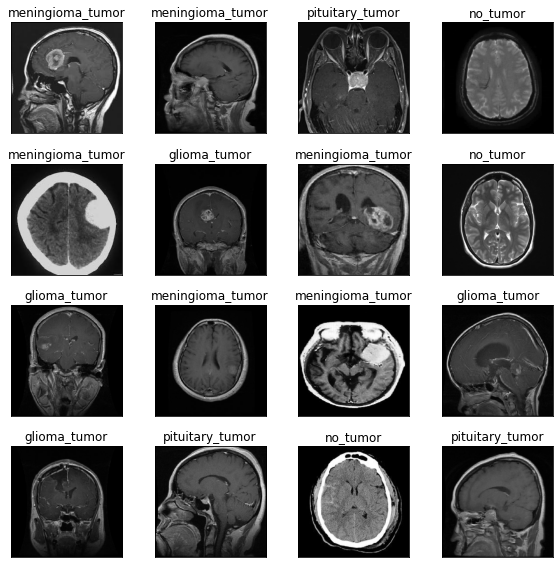

In [ ]:
import matplotlib.pyplot as plt

class_dict = {0:'glioma_tumor', 1:'meningioma_tumor', 2:'no_tumor', 3:'pituitary_tumor'}

plt.figure(figsize=(8,8))

for i in range(len(label)):
    plt.subplot(4,4,i+1)
    plt.title(str(class_dict[label[i]]))
    plt.xticks([]); plt.yticks([])

    plt.imshow(data[i])

plt.tight_layout()
plt.show()


# Fine Tuning 위한 pre-trained model 정의 및 모델 구축


In [ ]:
class_nums = train_generator.num_classes # 정답개수

pre_trained_model = MobileNet(weights = 'imagenet', include_top=False, input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))

model = Sequential()
model.add(pre_trained_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(class_nums, activation='softmax'))

model.summary()

17235968/17225924 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               524800    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                         

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(2e-5), metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping=EarlyStopping(monitor='val_loss', patience=5, verbose=1)

hist=model.fit(train_generator, epochs=50, validation_data=test_generator, callbacks=[earlystopping])

Epoch 1/50
80/80 [==============================] - 43s 364ms/step - loss: 1.5737 - acc: 0.3808 - val_loss: 1.1858 - val_acc: 0.3677
Epoch 2/50
80/80 [==============================] - 28s 351ms/step - loss: 1.0570 - acc: 0.5745 - val_loss: 0.8924 - val_acc: 0.6228
Epoch 3/50
80/80 [==============================] - 28s 352ms/step - loss: 0.8614 - acc: 0.6623 - val_loss: 0.7217 - val_acc: 0.7227
Epoch 4/50
80/80 [==============================] - 28s 352ms/step - loss: 0.7019 - acc: 0.7248 - val_loss: 0.6201 - val_acc: 0.7702
Epoch 5/50
80/80 [==============================] - 28s 351ms/step - loss: 0.6259 - acc: 0.7533 - val_loss: 0.5209 - val_acc: 0.8162
Epoch 6/50
80/80 [==============================] - 28s 352ms/step - loss: 0.5241 - acc: 0.8098 - val_loss: 0.4365 - val_acc: 0.8463
Epoch 7/50
80/80 [==============================] - 28s 352ms/step - loss: 0.4750 - acc: 0.8308 - val_loss: 0.3795 - val_acc: 0.8716
Epoch 8/50
80/80 [==============================] - 28s 353ms/step - 

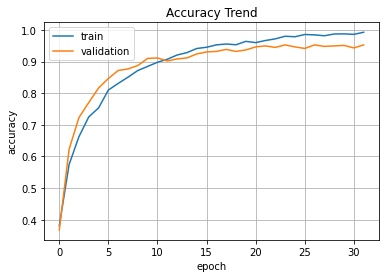

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

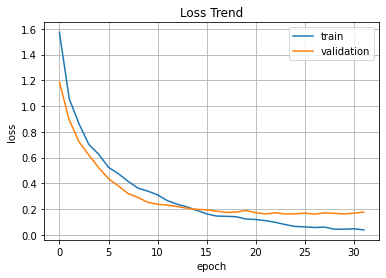

In [ ]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

In [50]:
import os.path
if os.path.isfile('content/test_brain_tumor.h2') is False:
   model.save('content/test_brain_tumor.h2')

INFO:tensorflow:Assets written to: content/test_brain_tumor.h2/assets


INFO:tensorflow:Assets written to: content/test_brain_tumor.h2/assets


In [ ]:
model.save('model.h5py')

INFO:tensorflow:Assets written to: model.h5py/assets


INFO:tensorflow:Assets written to: model.h5py/assets


In [51]:
from tensorflow.keras.callbacks import ModelCheckpoint

cp_path = '/content/gdrive/My Drive/Colab Notebooks'
checkpoint = ModelCheckpoint(filepath=cp_path,
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1)

In [ ]:
model.save('model_save2.h5')

In [ ]:
from tensorflow.keras.models import load_model
model=load_model('model_save2.h5')
model.evaluate(test_generator)

20/20 [==============================] - 4s 175ms/step - loss: 0.1767 - acc: 0.9525


[0.17669576406478882, 0.9524564146995544]

In [ ]:
import random
import os
import numpy as np
import cv2
import glob

label